# Stock Price Regression Project

## Project Overview
This project focuses on developing a predictive regression model to estimate stock prices using historical stock market data from the NSE (National Stock Exchange) for the years 2007 to 2012. The goal is to leverage machine learning techniques to predict future stock prices based on historical patterns and trends.

---

## Objectives
1. **Data Preparation**
   - Clean and preprocess the datasets for consistency and usability.
   - Handle missing data and outliers.
   - Standardize and normalize features as needed.

2. **Exploratory Data Analysis (EDA)**
   - Analyze data distributions and trends over time.
   - Identify correlations and relationships between features.
   - Visualize key insights.

3. **Feature Engineering**
   - Create new predictive features from the data (e.g., moving averages, price change trends).
   - Select relevant features for the regression model.

4. **Model Development**
   - Split the data into training and testing sets.
   - Implement multiple regression algorithms (e.g., Linear Regression, Random Forest, Gradient Boosting).
   - Tune hyperparameters for optimal performance.

5. **Model Evaluation**
   - Evaluate model performance using metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared.
   - Compare models to determine the best-performing approach.

6. **Deployment and Reporting**
   - Package the final model for deployment.
   - Present findings and insights through visualizations and a detailed report.

---

## Workflow
### 1. Data Preparation
- Merge datasets from 2007 to 2012.
- Clean data by addressing missing values and outliers.
- Convert necessary columns to numeric types.

### 2. Exploratory Data Analysis
- Analyze stock performance trends over time.
- Examine correlations between features (e.g., trading volume and stock prices).
- Visualize distributions and detect anomalies.

### 3. Feature Engineering
- Generate lagged features, moving averages, or volatility measures.
- Normalize or scale features for regression models.

### 4. Model Development
- Train-test split (e.g., 80-20 or time-based split).
- Build baseline regression models and evaluate performance.
- Experiment with advanced algorithms and fine-tune.

### 5. Model Evaluation
- Use evaluation metrics to compare models.
- Plot predictions vs. actual values for validation.
- Identify key factors influencing stock price predictions.
---

## Tools and Technologies
- **Data Handling**: Python (Pandas, NumPy)
- **Visualization**: Matplotlib, Seaborn
- **Modeling**: Scikit-learn, XGBoost

---

## Deliverables
1. Cleaned and preprocessed datasets.
2. Feature-engineered dataset ready for modeling.
3. Trained regression models with evaluation results.
4. Final model packaged for deployment.
5. Comprehensive project report.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### Data Preparation
   - Clean and preprocess the datasets for consistency and usability.
   - Handle missing data and outliers.
   - Standardize and normalize features as needed.

In [3]:
stocks_datasets = {}
file_paths = [f'data/NSE_data_all_stocks_{year}.csv' for year in range(2007, 2013)]
for year, file_path in zip(range(2007, 2013), file_paths):
    stocks_datasets[year] = pd.read_csv(file_path)

# Display the first few rows of each dataset to confirm successful loading
data_samples = {year: stocks_datasets[year].head() for year in stocks_datasets}
data_samples

{2007:        DATE  CODE                     NAME 12m Low 12m High Day Low Day High  \
 0  1/2/2007  EGAD                  Eaagads      22       57      52       52   
 1  1/2/2007  KAPC            Kapchorua Tea     111      148     100      100   
 2  1/2/2007  KUKZ                   Kakuzi    67.5       89    42.5       45   
 3  1/2/2007   REA  Rea Vipingo Plantations    14.5     23.5      25     26.5   
 4  1/2/2007  SASN    Sasini Tea and Coffee    10.5     13.6     140      145   
 
   Day Price Previous Change Change%  Volume Adjust  
 0        52       52      -       -     300     26  
 1       100     98.5    1.5   1.50%   7,800      -  
 2      43.5    42.25   1.25   2.87%   2,700      -  
 3      25.5    25.75  -0.25   0.98%  10,500      -  
 4       140      141     -1   0.71%  70,900  23.33  ,
 2008:        Date   CODE                  NAME   12m Low  12m High   Day Low  \
 0  1/2/2008  ^N20I    NSE 20-Share Index  3,396.83  5,030.91  5,167.18   
 1  1/2/2008   ACCS     A

In [4]:
# Display the column names of the datasets
column_names = {year: stocks_datasets[year].columns for year in stocks_datasets}
column_names

{2007: Index(['DATE', 'CODE', 'NAME', '12m Low', '12m High', 'Day Low', 'Day High',
        'Day Price', 'Previous', 'Change', 'Change%', 'Volume', 'Adjust'],
       dtype='object'),
 2008: Index(['Date', 'CODE', 'NAME', '12m Low', '12m High', 'Day Low', 'Day High',
        'Day Price', 'Previous', 'Change', 'Change%', 'Volume', 'Adjusted'],
       dtype='object'),
 2009: Index(['DATE', 'CODE', 'NAME', '12m Low', '12m High', 'Day Low', 'Day High',
        'Day Price', 'Previous', 'Change', 'Change%', 'Volume', 'Adjust'],
       dtype='object'),
 2010: Index(['DATE', 'CODE', 'NAME', '12m Low', '12m High', 'Day Low', 'Day High',
        'Day Price', 'Previous', 'Change', 'Change%', 'Volume', 'Adjust'],
       dtype='object'),
 2011: Index(['DATE', 'CODE', 'NAME', '12m Low', '12m High', 'Day Low', 'Day High',
        'Day Price', 'Previous', 'Change', 'Change%', 'Volume', 'Adjust'],
       dtype='object'),
 2012: Index(['DATE', 'CODE', 'NAME', '12m Low', '12m High', 'Day Low', 'Day High',

In [5]:
# Harmonize the column names across all datasets
for year in stocks_datasets:
    stocks_datasets[year] = stocks_datasets[year].rename(columns={
        'DATE': 'Date',
        'CODE': 'Code',
        'NAME': 'Name',
        '12m Low': '12m_Low',
        '12m High': '12m_High',
        'Day Low': 'Day_Low',
        'Day High': 'Day_High',
        'Day Price': 'Day_Price',
        'Previous': 'Previous',
        'Change': 'Change',
        'Change%': 'Change%',
        'Volume': 'Volume',
        'Adjust': 'Adjust',
        'Adjusted': 'Adjust'
    })

In [6]:
# Display the shape of the datasets
dataset_shapes = {year: stocks_datasets[year].shape for year in stocks_datasets}
dataset_shapes

{2007: (10608, 13),
 2008: (10583, 13),
 2009: (14386, 13),
 2010: (14952, 13),
 2011: (14931, 13),
 2012: (16044, 13)}

In [7]:
# Let's merge all the datasets into a single dataset
stocks_data = pd.concat(stocks_datasets.values(), ignore_index=True)
stocks_data

,Date,Code,Name,12m_Low,12m_High,Day_Low,Day_High,Day_Price,Previous,Change,Change%,Volume,Adjust
0,1/2/2007,EGAD,Eaagads,22,57,52,52,52,52,-,-,300,26
1,1/2/2007,KAPC,Kapchorua Tea,111,148,100,100,100,98.5,1.5,1.50%,"7,800",-
2,1/2/2007,KUKZ,Kakuzi,67.5,89,42.5,45,43.5,42.25,1.25,2.87%,"2,700",-
3,1/2/2007,REA,Rea Vipingo Plantations,14.5,23.5,25,26.5,25.5,25.75,-0.25,0.98%,"10,500",-
4,1/2/2007,SASN,Sasini Tea and Coffee,10.5,13.6,140,145,140,141,-1,0.71%,"70,900",23.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
81499,12/31/2012,REA,Rea Vipingo Plantations,14.5,23.5,19,19,19,19,-,-,"1,000",-
81500,12/31/2012,LIMT,Limuru Tea,400,500,430,430,430,430,-,-,0,-
81501,12/31/2012,KUKZ,Kakuzi,67.5,89,72,72,72,69,3,4.17%,"1,000",-
81502,12/31/2012,KAPC,Kapchorua Tea,111,148,118,118,118,118,-,-,100,-


In [8]:
# Display Column names
stocks_data.columns

Index(['Date', 'Code', 'Name', '12m_Low', '12m_High', 'Day_Low', 'Day_High',
       'Day_Price', 'Previous', 'Change', 'Change%', 'Volume', 'Adjust'],
      dtype='object')

In [9]:
# Display the shape of the merged dataset
stocks_data.shape

(81504, 13)

In [10]:
# Display Unique values for each column
unique_values = {column: stocks_data[column].unique() for column in stocks_data.columns}
unique_values['Name']

array(['Eaagads', 'Kapchorua Tea', 'Kakuzi', 'Rea Vipingo Plantations',
       'Sasini Tea and Coffee', 'Unilever Tea Kenya',
       'Williamson Tea Kenya', 'Car and General (K)', 'CMC Holdings',
       'Sameer Africa', 'Barclays Bank', 'CFC Stanbic Holdings',
       'Diamond Trust Bank Kenya', 'Equity Bank', 'Housing Finance',
       'Kenya Commercial Bank', 'National Bank of Kenya', 'NIC Bank',
       'Standard Chartered Bank', 'Kenya Airways', 'Nation Media Group',
       'ScanGroup', 'Standard Group', 'TPS Eastern Africa (Serena)',
       'Express', 'Athi River Mining', 'Bamburi Cement', 'Crown Berger',
       'E.A.Cables', 'E.A.Portland Cement', 'KenGen', 'KenolKobil',
       'Kenya Power and Lighting', 'Total Kenya', 'Jubilee Holdings',
       'Pan Africa Insurance Holdings', 'Centum Investment',
       'Olympia Capital Holdings', 'British American Tobacco Kenya',
       'A.Baumann', 'East African Breweries', 'Eveready East Africa',
       'Mumias Sugar', 'Unga Group', 'NSE 20-Sh

In [11]:
stocks_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81504 entries, 0 to 81503
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       81504 non-null  object
 1   Code       81504 non-null  object
 2   Name       81456 non-null  object
 3   12m_Low    81504 non-null  object
 4   12m_High   81504 non-null  object
 5   Day_Low    81504 non-null  object
 6   Day_High   81504 non-null  object
 7   Day_Price  81504 non-null  object
 8   Previous   81504 non-null  object
 9   Change     81504 non-null  object
 10  Change%    81504 non-null  object
 11  Volume     81504 non-null  object
 12  Adjust     81504 non-null  object
dtypes: object(13)
memory usage: 8.1+ MB


In [12]:
# Investigate rows containing '-' in each column
columns_with_dash = [column for column in stocks_data.columns if '-' in stocks_data[column].values]
dash_rows = {column: stocks_data[stocks_data[column] == '-'] for column in columns_with_dash}
for column, data in dash_rows.items():
    # Let's print the count
    print(f'Column: {column}, Count of rows: {len(data)}')


Column: Previous, Count of rows: 12
Column: Change, Count of rows: 30363
Column: Change%, Count of rows: 30373
Column: Adjust, Count of rows: 60995


#### Data Cleaning Steps
1. **Step 1: Replace '-' with np.nan**
    - To ensure missing values are handled appropriately, replace all occurrences of '-' with np.nan across the dataset.

2. **Step 2: Drop the 'Adjust' Column**
    - The 'Adjust' column contains too many missing values (60k out of 80k rows), making it unreliable for analysis. Drop this column.

3. **Step 3: Handle Missing Values in 'Previous'**
    - Use forward-fill (method='ffill') to propagate the last valid observation forward to fill missing values in 'Previous'.

4. **Step 4: Recalculate 'Change' and 'Change%'**
    - Since 'Change' and 'Change%' columns have many missing values, we will recalculate them based on 'Day_Price' and 'Previous'.

5. **Step 5: Verify the Dataset**
    - Check for any remaining missing values in critical columns and ensure the dataset's integrity.


In [13]:
# Replace ',' with '' in all columns to handle thousands separators
stocks_data = stocks_data.replace(',', '', regex=True)

# Convert columns to numeric where applicable
# This step is critical if some columns need to remain as strings
numeric_columns = ['12m_Low', '12m_High', 'Day_Low', 'Day_High',
                   'Day_Price', 'Previous', 'Change', 'Change%', 'Volume']

# Apply numeric conversion to these columns
for col in numeric_columns:
    stocks_data[col] = pd.to_numeric(stocks_data[col], errors='coerce')



In [14]:
stocks_data

,Date,Code,Name,12m_Low,12m_High,Day_Low,Day_High,Day_Price,Previous,Change,Change%,Volume,Adjust
0,1/2/2007,EGAD,Eaagads,22.0,57.0,52.0,52.0,52.0,52.00,NaN,NaN,300,26
1,1/2/2007,KAPC,Kapchorua Tea,111.0,148.0,100.0,100.0,100.0,98.50,1.50,NaN,7800,-
2,1/2/2007,KUKZ,Kakuzi,67.5,89.0,42.5,45.0,43.5,42.25,1.25,NaN,2700,-
3,1/2/2007,REA,Rea Vipingo Plantations,14.5,23.5,25.0,26.5,25.5,25.75,-0.25,NaN,10500,-
4,1/2/2007,SASN,Sasini Tea and Coffee,10.5,13.6,140.0,145.0,140.0,141.00,-1.00,NaN,70900,23.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
81499,12/31/2012,REA,Rea Vipingo Plantations,14.5,23.5,19.0,19.0,19.0,19.00,NaN,NaN,1000,-
81500,12/31/2012,LIMT,Limuru Tea,400.0,500.0,430.0,430.0,430.0,430.00,NaN,NaN,0,-
81501,12/31/2012,KUKZ,Kakuzi,67.5,89.0,72.0,72.0,72.0,69.00,3.00,NaN,1000,-
81502,12/31/2012,KAPC,Kapchorua Tea,111.0,148.0,118.0,118.0,118.0,118.00,NaN,NaN,100,-


In [15]:
# Step 1: Replace '-' with np.nan
stocks_data = stocks_data.replace('-', np.nan)

# Step 2: Drop the 'Adjust' Column
stocks_data = stocks_data.drop(columns='Adjust')

# Step 3: Handle Missing Values in 'Previous'
stocks_data['Previous'] = stocks_data['Previous'].fillna(method='ffill')

# Step 4: Recalculate 'Change' and 'Change%'
stocks_data['Day_Price'] = pd.to_numeric(stocks_data['Day_Price'], errors='coerce')
stocks_data['Previous'] = pd.to_numeric(stocks_data['Previous'], errors='coerce')
stocks_data['Change'] = stocks_data['Day_Price'] - stocks_data['Previous']
stocks_data['Change%'] = (stocks_data['Change'] / stocks_data['Previous']) * 100



/tmp/ipykernel_42736/822388180.py:8: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  stocks_data['Previous'] = stocks_data['Previous'].fillna(method='ffill')


In [16]:
# Investigate columns with missing values and their count
missing_values_count = stocks_data.isnull().sum()
missing_values_count = missing_values_count[missing_values_count > 0]
print(missing_values_count)

Name    48
dtype: int64


In [17]:
# Check rows with missing Name values
missing_name_rows = stocks_data[stocks_data['Name'].isnull()]
missing_name_rows

,Date,Code,Name,12m_Low,12m_High,Day_Low,Day_High,Day_Price,Previous,Change,Change%,Volume
7359,9/5/2007,OCH-R,NaN,0.60,0.60,0.50,1.00,0.95,19.20,-18.25,-95.052083,253000
7403,9/6/2007,OCH-R,NaN,0.60,0.60,0.45,1.00,0.45,0.95,-0.50,-52.631579,511800
7448,9/7/2007,OCH-R,NaN,0.60,0.60,0.05,0.50,0.20,0.45,-0.25,-55.555556,404800
7492,9/10/2007,OCH-R,NaN,0.60,0.60,0.15,0.70,0.40,0.20,0.20,100.000000,272200
7537,9/11/2007,OCH-R,NaN,0.60,0.60,0.20,1.00,0.20,0.40,-0.20,-50.000000,5170000
7583,9/12/2007,OCH-R,NaN,0.60,0.60,0.25,1.00,0.55,0.20,0.35,175.000000,329000
7627,9/13/2007,OCH-R,NaN,0.60,0.60,0.10,1.00,0.40,0.55,-0.15,-27.272727,3040000
7671,9/14/2007,OCH-R,NaN,0.60,0.60,0.40,2.00,0.60,0.40,0.20,50.000000,3650000
8723,10/22/2007,NIC-R,NaN,5.05,98.00,54.50,55.00,54.50,191.00,-136.50,-71.465969,1000
8764,10/23/2007,NIC-R,NaN,5.05,98.00,90.00,100.00,95.00,54.50,40.50,74.311927,5100


In [18]:
# Let's back-fill the Day_price and Previous columns
stocks_data['Day_Price'] = stocks_data['Day_Price'].fillna(method='bfill')
stocks_data['Previous'] = stocks_data['Previous'].fillna(method='bfill')


/tmp/ipykernel_42736/4124007545.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  stocks_data['Day_Price'] = stocks_data['Day_Price'].fillna(method='bfill')
/tmp/ipykernel_42736/4124007545.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  stocks_data['Previous'] = stocks_data['Previous'].fillna(method='bfill')


In [19]:
# Let's recalculate the Change and Change% columns again
stocks_data['Change'] = stocks_data['Day_Price'] - stocks_data['Previous']
stocks_data['Change%'] = (stocks_data['Change'] / stocks_data['Previous']) * 100

# Exploratory Data Analysis (EDA) for Stock Price Prediction

## Objective
The purpose of Exploratory Data Analysis (EDA) is to:
1. Understand the dataset’s structure and distribution.
2. Identify relationships between features and the target variable (`Day_Price`).
3. Detect outliers, anomalies, and trends.
4. Ensure the dataset’s readiness for feature engineering and modeling.

---

## Steps in EDA

### 1. **Understand the Dataset**
- **View Basic Statistics:**
  - Use `df.describe()` to obtain an overview of numerical data.
  - Use `df.info()` to understand data types and non-null counts.
- **Check Class Distribution:**
  - Analyze the frequency of each stock (`Code`) to identify dominant ones.

---

### 2. **Univariate Analysis**
- **Numerical Columns:**
  - Plot histograms for `Day_Price`, `12m_Low`, `12m_High`, `Previous`, and `Volume` to observe distributions.
  - Calculate skewness and kurtosis to check normality.
- **Categorical Columns:**
  - Use bar charts to display the distribution of stocks (`Code`) and any other categorical data.

---

### 3. **Bivariate Analysis**
- **Target vs Features:**
  - Scatter plots of `Day_Price` vs other numerical features (`Previous`, `Day_High`, `Day_Low`) to understand relationships.
  - Correlation matrix (heatmap) to evaluate relationships between numerical features and target (`Day_Price`).
  - Boxplots of `Day_Price` grouped by `Code` to assess stock-specific behavior.

---

### 4. **Outlier Detection**
- Use boxplots to identify outliers in numerical columns (e.g., `Day_Price`, `Volume`, `12m_High`).
- Confirm outliers with interquartile range (IQR) analysis.

---

### 5. **Time-Series Analysis**
- For temporal insights:
  - Plot `Day_Price` trends over time for selected stocks.
  - Plot `Volume` trends over time to correlate trading activity with price.

---

### 6. **Missing Value Analysis**
- Review missing value statistics.
- Visualize missing data patterns using heatmaps.
- Address handling methods:
  - Forward fill for `Previous`.
  - Recalculation for `Change` and `Change%`.
  - Dropping irrelevant or excessively missing columns (e.g., `Adjust`).

---

### 7. **Feature-Target Relationships**
- Analyze how predictors like `Previous`, `Day_High`, and `Day_Low` influence `Day_Price`.
- Check whether engineered features (e.g., `Price Range`, `Momentum Indicator`) show strong correlations with `Day_Price`.

---

## Deliverables
1. Statistical summary tables.
2. Visualizations:
   - Histograms and boxplots for numerical data.
   - Correlation heatmaps.
   - Scatter plots and line charts.
3. Insights on:
   - Distributions, trends, and relationships.
   - Outliers and anomalies.
   - Missing data handling strategies.


In [20]:
# Display basic statistics of the dataset
stocks_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81504 entries, 0 to 81503
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       81504 non-null  object 
 1   Code       81504 non-null  object 
 2   Name       81456 non-null  object 
 3   12m_Low    81504 non-null  float64
 4   12m_High   81504 non-null  float64
 5   Day_Low    81504 non-null  float64
 6   Day_High   81504 non-null  float64
 7   Day_Price  81504 non-null  float64
 8   Previous   81504 non-null  float64
 9   Change     81504 non-null  float64
 10  Change%    81504 non-null  float64
 11  Volume     81504 non-null  int64  
dtypes: float64(8), int64(1), object(3)
memory usage: 7.5+ MB


In [21]:
stocks_data

,Date,Code,Name,12m_Low,12m_High,Day_Low,Day_High,Day_Price,Previous,Change,Change%,Volume
0,1/2/2007,EGAD,Eaagads,22.0,57.0,52.0,52.0,52.0,52.00,0.00,0.000000,300
1,1/2/2007,KAPC,Kapchorua Tea,111.0,148.0,100.0,100.0,100.0,98.50,1.50,1.522843,7800
2,1/2/2007,KUKZ,Kakuzi,67.5,89.0,42.5,45.0,43.5,42.25,1.25,2.958580,2700
3,1/2/2007,REA,Rea Vipingo Plantations,14.5,23.5,25.0,26.5,25.5,25.75,-0.25,-0.970874,10500
4,1/2/2007,SASN,Sasini Tea and Coffee,10.5,13.6,140.0,145.0,140.0,141.00,-1.00,-0.709220,70900
...,...,...,...,...,...,...,...,...,...,...,...,...
81499,12/31/2012,REA,Rea Vipingo Plantations,14.5,23.5,19.0,19.0,19.0,19.00,0.00,0.000000,1000
81500,12/31/2012,LIMT,Limuru Tea,400.0,500.0,430.0,430.0,430.0,430.00,0.00,0.000000,0
81501,12/31/2012,KUKZ,Kakuzi,67.5,89.0,72.0,72.0,72.0,69.00,3.00,4.347826,1000
81502,12/31/2012,KAPC,Kapchorua Tea,111.0,148.0,118.0,118.0,118.0,118.00,0.00,0.000000,100


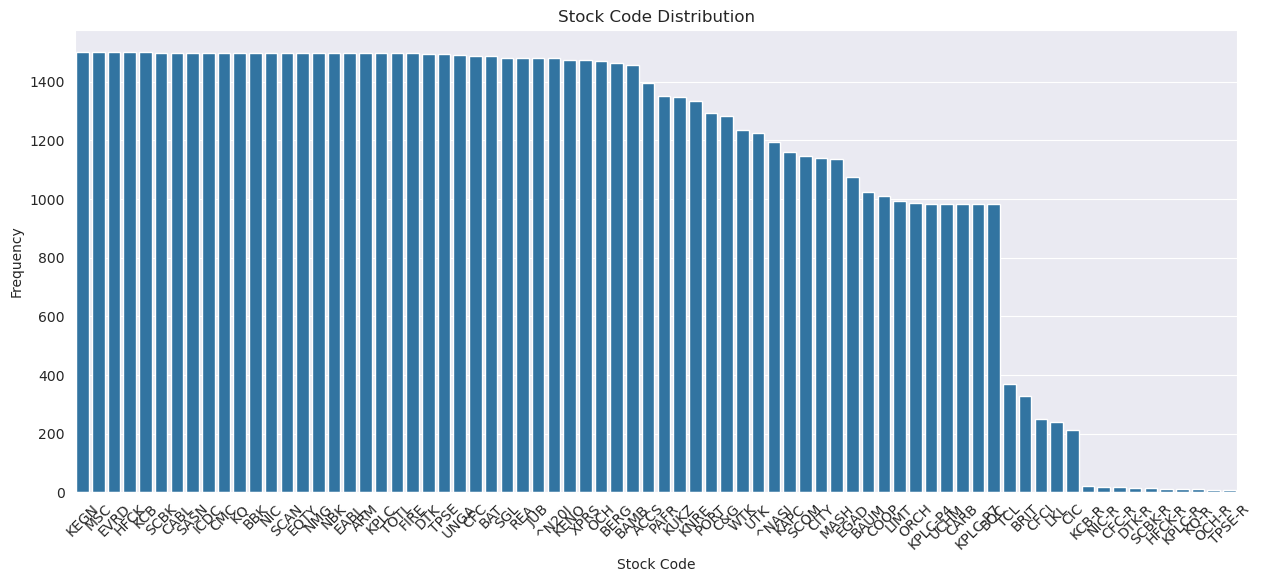

In [22]:
# Class Distribution
stock_counts = stocks_data['Code'].value_counts()
stock_counts

# # Plot the class distribution
plt.figure(figsize=(15, 6))
sns.barplot(x=stock_counts.index, y=stock_counts.values)
plt.title('Stock Code Distribution')
plt.xlabel('Stock Code')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


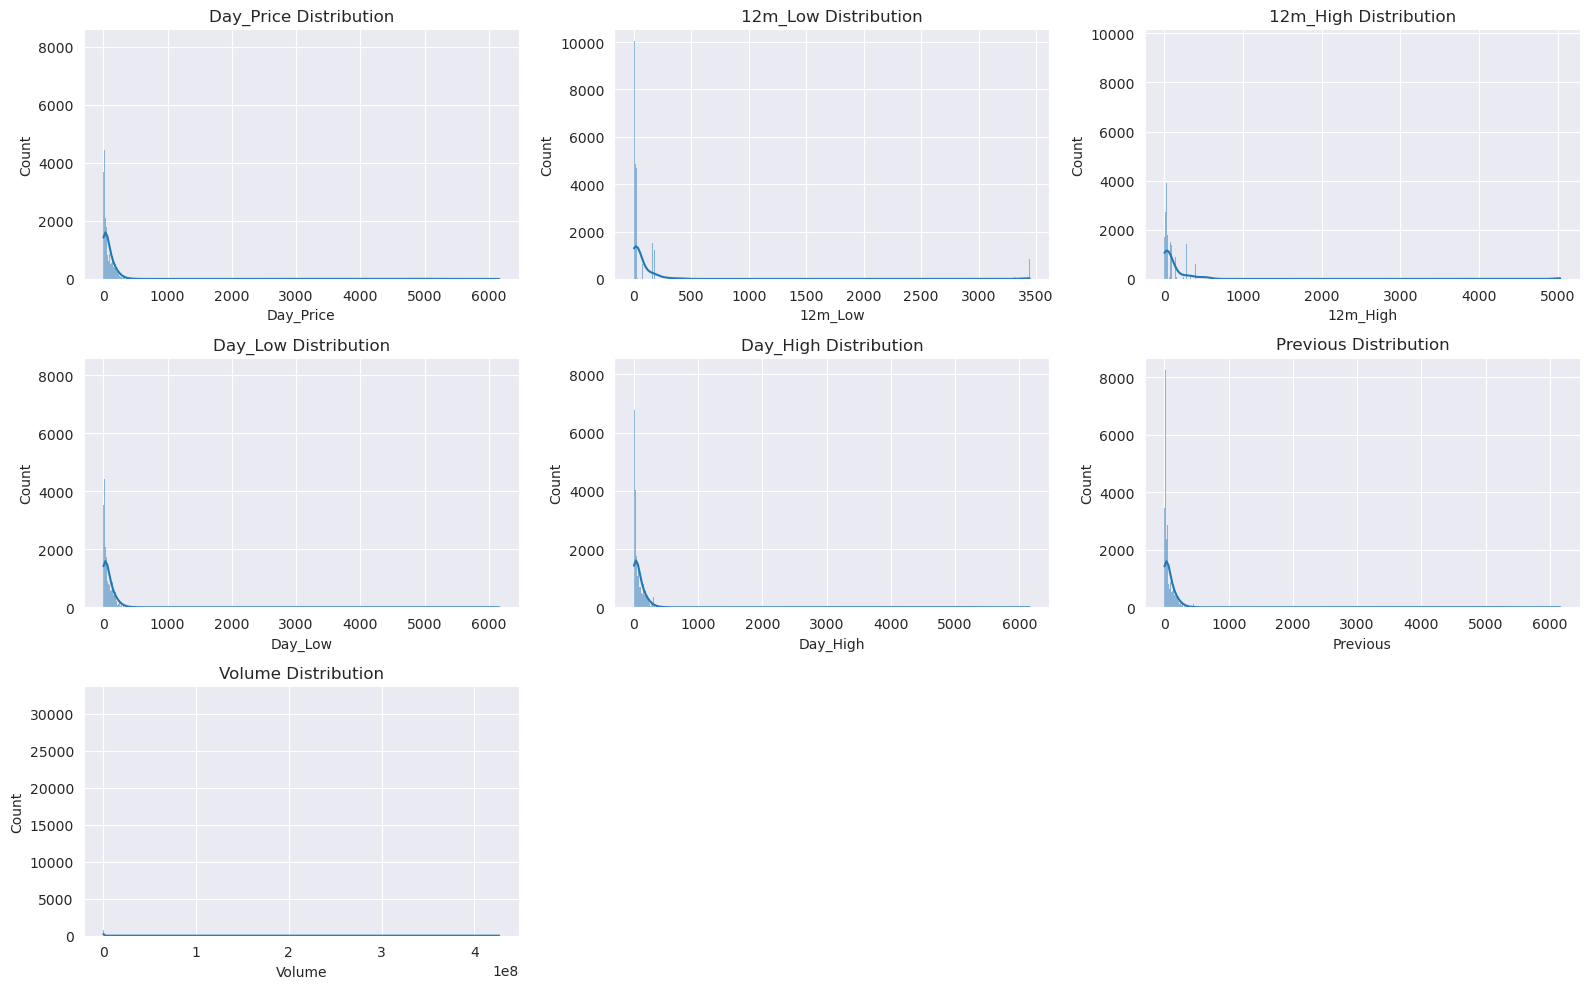

==>> Day_Price: Skewness = 7.47, Kurtosis = 56.94
==>> 12m_Low: Skewness = 6.93, Kurtosis = 47.33
==>> 12m_High: Skewness = 6.82, Kurtosis = 46.19
==>> Day_Low: Skewness = 7.47, Kurtosis = 56.97
==>> Day_High: Skewness = 7.47, Kurtosis = 56.90
==>> Previous: Skewness = 7.47, Kurtosis = 56.92
==>> Volume: Skewness = 22.77, Kurtosis = 1048.88


In [23]:
# Univariate Analysis
from scipy.stats import skew, kurtosis
# Numerical Columns
numerical_columns = ['Day_Price', '12m_Low', '12m_High', 'Day_Low','Day_High','Previous', 'Volume']
# Plot histograms for numerical columns
plt.figure(figsize=(16, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(stocks_data[column], kde=True)
    plt.title(f'{column} Distribution')
plt.tight_layout()
plt.show()

# Calculate skewness and kurtosis for numerical columns
for col in numerical_columns:
    skewness = skew(stocks_data[col].dropna())
    kurt = kurtosis(stocks_data[col].dropna())
    print(f'==>> {col}: Skewness = {skewness:.2f}, Kurtosis = {kurt:.2f}')



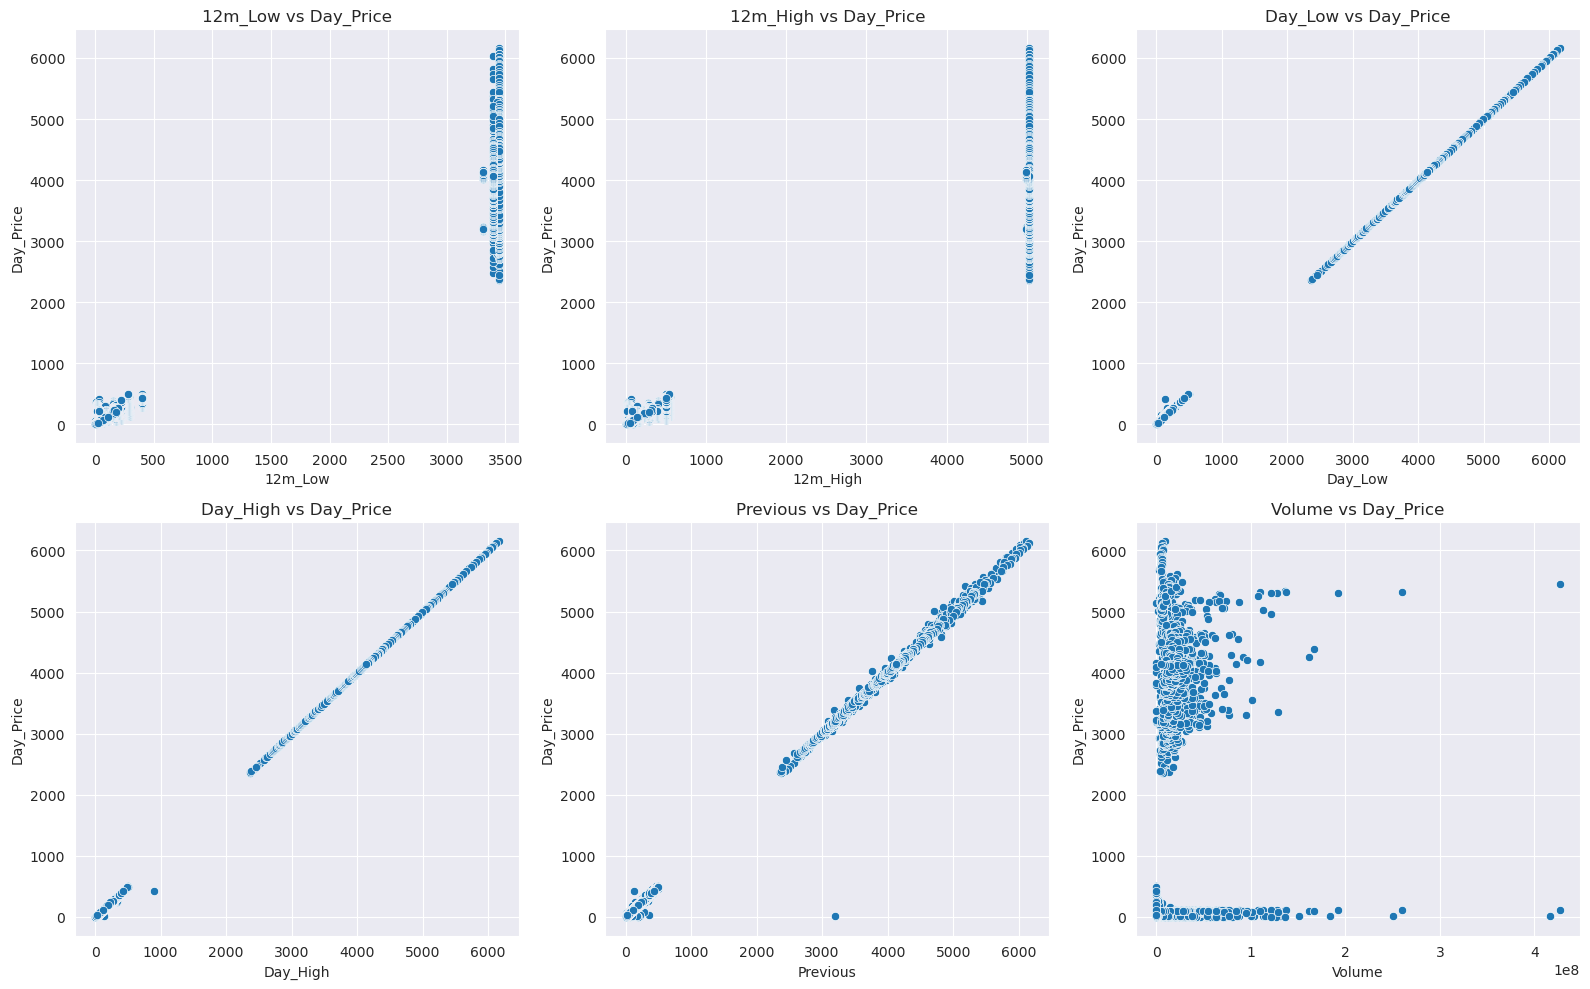

In [24]:
# Bi-variate Analysis
# Scatter plots of Day_Price vs other numerical features
plt.figure(figsize=(16, 10))
for i, column in enumerate(numerical_columns[1:], 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(x=column, y='Day_Price', data=stocks_data)
    plt.title(f'{column} vs Day_Price')
plt.tight_layout()
plt.show()



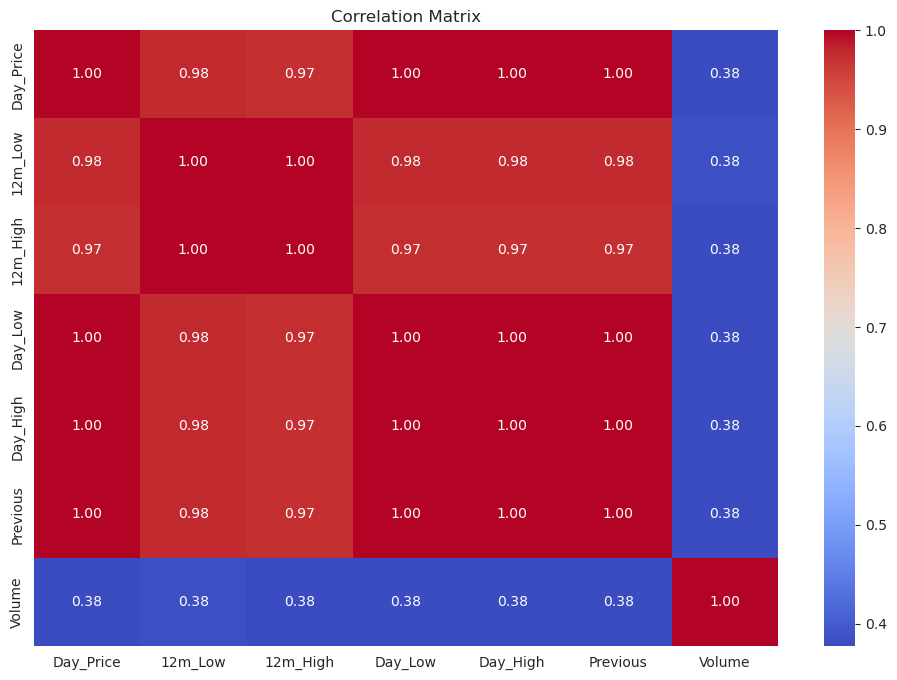

In [25]:
# Correlation matrix (heatmap)
plt.figure(figsize=(12, 8))
sns.heatmap(stocks_data[numerical_columns].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

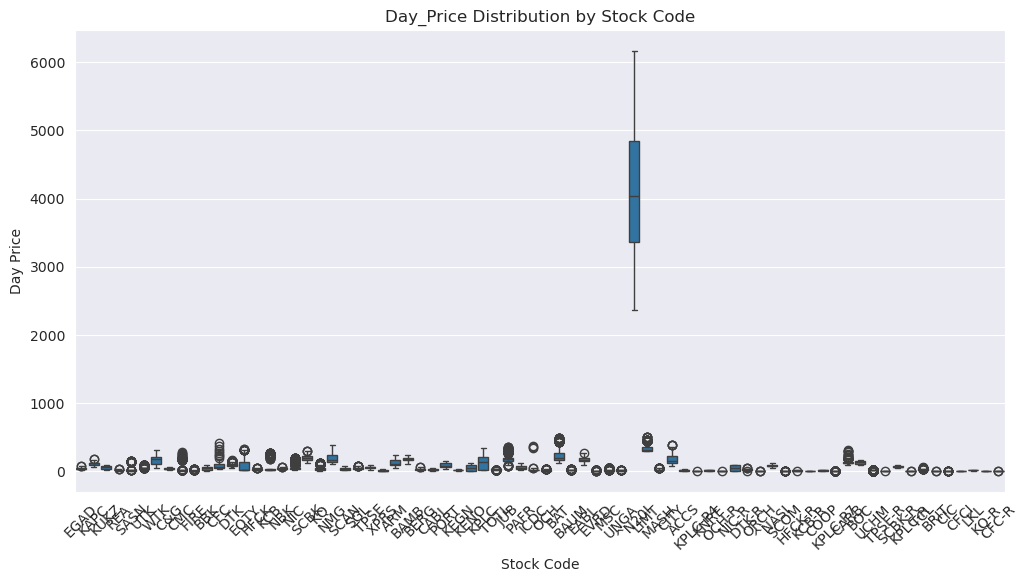

In [26]:
# Box-plots of Day_Price grouped by Code
plt.figure(figsize=(12, 6))
sns.boxplot(x='Code', y='Day_Price', data=stocks_data)
plt.title('Day_Price Distribution by Stock Code')
plt.xlabel('Stock Code')
plt.ylabel('Day Price')
plt.xticks(rotation=45)
plt.show()

# Feature Engineering for Stock Prediction

## Goal
To define the features and target variable for predicting stock performance using our dataset.

---

## Prediction Target (Dependent Variable)
### Chosen Target:
**Day_Price**: Predict the stock's closing price for the day.

---

## Features (Independent Variables)
We select features that are likely to influence the Day_Price directly or indirectly.

### Direct Predictors:
1. **12m_Low**: The 12-month lowest price (helps identify trends).
2. **12m_High**: The 12-month highest price (helps identify trends).
3. **Day_Low**: The day’s lowest price (correlates directly with closing prices).
4. **Day_High**: The day’s highest price.
5. **Previous**: The previous day's price (provides continuity in trends).
6. **Volume**: The number of trades (proxy for market activity).

### Excluded Predictors:
1. **Code** and **Name**: Relevant for stock identification but irrelevant for numerical prediction.
2. **Change** and **Change%**: Derivable from Day_Price and Previous.

---

## Finalized Features
**Target:** `Day_Price`

**Selected Features:**
- 12m_Low
- 12m_High
- Day_Low
- Day_High
- Previous
- Volume

---

### Simplicity Justification
For simplicity and alignment with the project’s scope, advanced engineered features like Price Range, Volatility Ratios, and Momentum Indicators are excluded. The current selection balances informativeness and computational efficiency.

---

**Next Steps:** Proceed to model training and evaluation based on this feature setup.



In [27]:
# Selected Features and Target Variable
selected_features = ['12m_Low', '12m_High', 'Day_Low', 'Day_High', 'Previous', 'Volume']
target_variable = 'Day_Price'


In [28]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

In [29]:
# We will use expanding window cross-validation to train and evaluate the model
# Define expanding window cross-validation function

def expanding_window_cv(stocks, features, target, model, initial_train_size, test_size, step_size):
    """
    Perform expanding window cross-validation and compute multiple regression metrics.

    Parameters:
        stocks (DataFrame): The dataset containing features and target.
        features (list): List of feature column names.
        target (str): Target column name.
        model: The regression model to use.
        initial_train_size (int): Number of initial rows for training.
        test_size (int): Number of rows for each test set.
        step_size (int): Increment for expanding the training set.

    Returns:
        dict: Dictionary with lists of metrics for each fold.
    """
    n_samples:int = stocks.shape[0]
    indices = np.arange(n_samples)
    print(f"======= Total samples: {n_samples}, Type: {type(n_samples)}")

    _metrics = {
        "MAE": [],
        "MSE": [],
        "RMSE": [],
        "R2": []
    }

    for start in range(0, n_samples - initial_train_size - test_size, step_size):
        train_start = start
        train_end = train_start + initial_train_size
        test_start = train_end
        test_end = test_start + test_size

        # Split train and test sets
        train_indices = indices[train_start:train_end]
        test_indices = indices[test_start:test_end]

        X_train = data.iloc[train_indices][features]
        y_train = data.iloc[train_indices][target]
        X_test = data.iloc[test_indices][features]
        y_test = data.iloc[test_indices][target]

        # Train the model
        model.fit(X_train, y_train)

        # Predict
        y_pred = model.predict(X_test)

        # Compute metrics
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred)

        # Store metrics
        _metrics["MAE"].append(mae)
        _metrics["MSE"].append(mse)
        _metrics["RMSE"].append(rmse)
        _metrics["R2"].append(r2)

        print(f"Fold {len(metrics['MAE'])}: Train {train_start}-{train_end}, Test {test_start}-{test_end}, "
              f"MAE: {mae:.4f}, MSE: {mse:.4f}, RMSE: {rmse:.4f}, R2: {r2:.4f}")

    return _metrics


In [30]:
# Initialize the regression models
models = {
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42)
}

# Define parameters for expanding window cross-validation
init_train_size=1000,  # Use first 1000 rows for initial training
test_s=200,            # Test on 200 rows in each fold
step_s=200             # Expand training set by 200 rows per fold

In [31]:
# Perform expanding window cross-validation for each model
results = {}

for model_name, m in models.items():
    print(f"\nTraining and evaluating {model_name}...")
    results[model_name] = expanding_window_cv(
        stocks=stocks_data,
        features=selected_features,
        target=target_variable,
        model=m,
        initial_train_size=init_train_size,
        test_size=test_s,
        step_size=step_s
    )




Training and evaluating Random Forest...
======= Total samples: 81504, Type: <class 'int'>


TypeError: unsupported operand type(s) for -: 'int' and 'tuple'

In [ ]:
# Display the results for each model
for model_name, metrics in results.items():
    print(f"\n{model_name} Results:")
    for metric_name, values in metrics.items():
        avg_value = np.mean(values)
        print(f"{metric_name}: {avg_value:.4f}")

In [32]:
model = RandomForestRegressor(random_state=42)

# Convert non-numeric values to numeric format
# stocks_data[selected_features + [target_variable]] = stocks_data[selected_features + [target_variable]].replace(',', '', regex=True).apply(pd.to_numeric)

# Perform expanding window CV
metrics = expanding_window_cv(
    stocks=stocks_data,
    features=selected_features,
    target=target_variable,
    model=model,
    initial_train_size=1000,  # Use first 1000 rows for initial training
    test_size=200,            # Test on 200 rows in each fold
    step_size=200             # Expand training set by 200 rows per fold
)

# Compute average metrics across folds
average_metrics = {key: np.mean(value) for key, value in metrics.items()}
print("\nAverage Metrics Across Folds:")
for metric, value in average_metrics.items():
    print(f"{metric}: {value:.4f}")

======= Total samples: 81504, Type: <class 'int'>


ValueError: could not convert string to float: '3,396.83'

In [39]:
# Replace ',' with '' in all columns to handle thousands separators
stocks_data = stocks_data.replace(',', '', regex=True)

# Convert columns to numeric where applicable
numeric_columns = ['12m_Low', '12m_High', 'Day_Low', 'Day_High',
                   'Day_Price', 'Previous', 'Change', 'Change%', 'Volume']

# Apply numeric conversion with error handling
for col in numeric_columns:
    stocks_data[col] = pd.to_numeric(stocks_data[col], errors='coerce')

# Check for rows that still contain non-numeric values in numeric columns
for col in numeric_columns:
    non_numeric_rows = stocks_data[stocks_data[col].isna()]
    if not non_numeric_rows.empty:
        print(f"Non-numeric values found in column '{col}':")
        print(non_numeric_rows)

# Validate the types of all columns
print(stocks_data.dtypes)

# Ensure target variable and features have no NaNs
if stocks_data[numeric_columns].isnull().values.any():
    print("Some numeric columns still contain NaN values. Cleaning required.")
else:
    print("All numeric columns are clean and ready for modeling.")



Date          object
Code          object
Name          object
12m_Low      float64
12m_High     float64
Day_Low      float64
Day_High     float64
Day_Price    float64
Previous     float64
Change       float64
Change%      float64
Volume         int64
dtype: object
All numeric columns are clean and ready for modeling.


Model Equation: y = 2.40x + -0.10
Mean Squared Error (MSE): 0.0000
R-squared (R²): 1.0000


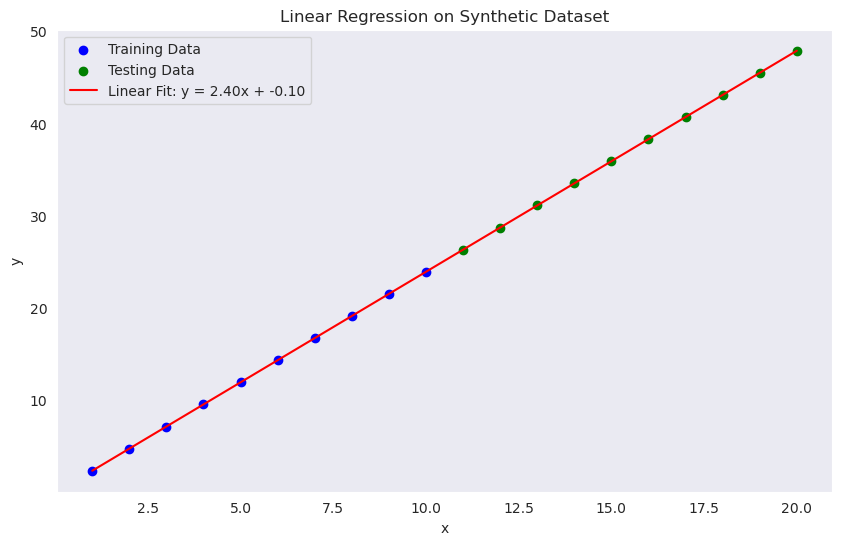

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Create a synthetic dataset
x = np.array([1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0,
              11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0]).reshape(-1, 1)
y = np.array([2.3, 4.7, 7.1, 9.5, 11.9, 14.3, 16.7, 19.1, 21.5, 23.9,
              26.3, 28.7, 31.1, 33.5, 35.9, 38.3, 40.7, 43.1, 45.5, 47.9])

# Step 2: Split into training and testing sets
x_train = x[:10]
y_train = y[:10]
x_test = x[10:]
y_test = y[10:]

# Step 3: Train the Linear Regression Model
model = LinearRegression()
model.fit(x_train, y_train)

# Get the model's parameters
m = model.coef_[0]
c = model.intercept_
print(f"Model Equation: y = {m:.2f}x + {c:.2f}")

# Step 4: Test the Model
y_pred = model.predict(x_test)

# Step 5: Evaluate the Model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R²): {r2:.4f}")

# Step 6: Visualization
plt.figure(figsize=(10, 6))
# Plot training data
plt.scatter(x_train, y_train, color='blue', label='Training Data')
# Plot testing data
plt.scatter(x_test, y_test, color='green', label='Testing Data')
# Plot regression line
plt.plot(x, model.predict(x), color='red', label=f'Linear Fit: y = {m:.2f}x + {c:.2f}')
plt.title('Linear Regression on Synthetic Dataset')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()


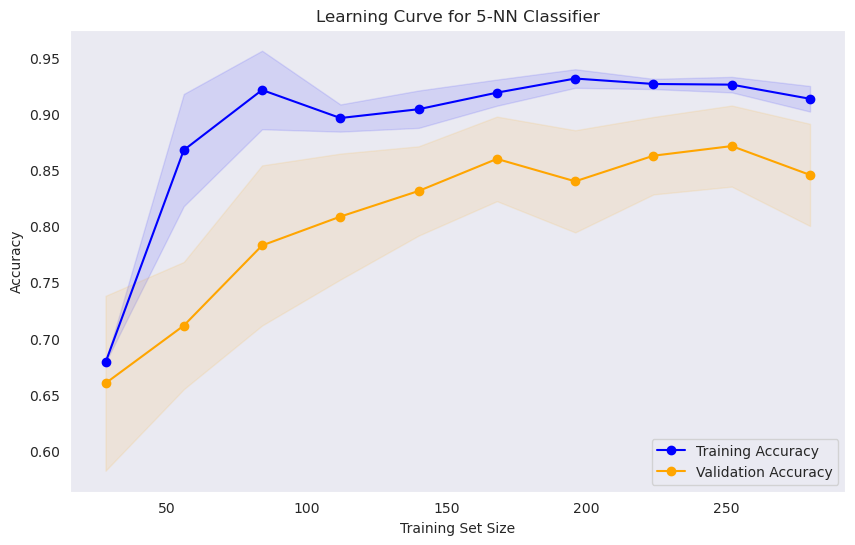

Test Set Accuracy: 0.8867


In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Step 1: Generate a synthetic classification dataset
X, y = make_classification(n_samples=500, n_features=10, n_informative=8,
                           n_redundant=2, random_state=42)

# Step 2: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Initialize the 5-NN Classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Step 4: Create learning curves
train_sizes, train_scores, test_scores = learning_curve(
    knn, X_train, y_train, cv=5, train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy')

# Step 5: Calculate mean and standard deviation of scores
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Step 6: Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color="blue", label="Training Accuracy")
plt.plot(train_sizes, test_scores_mean, 'o-', color="orange", label="Validation Accuracy")
plt.fill_between(train_sizes,
                 train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std,
                 alpha=0.1, color="blue")
plt.fill_between(train_sizes,
                 test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std,
                 alpha=0.1, color="orange")

plt.title("Learning Curve for 5-NN Classifier")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.grid()
plt.show()

# Step 7: Test the 5-NN model on the test set
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Set Accuracy: {test_accuracy:.4f}")
